In [1]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
datafiles = [join('.\\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [3]:
datafiles

['.\\data\\Guess_2020_part0_2025-05-14_17h56.07.624.csv',
 '.\\data\\Guess_2020_part1_part2_2025-05-14_18h17.02.827.csv',
 '.\\data\\Guess_2020_sm_2025-05-14_18h51.28.478.csv',
 '.\\data\\Guess_2345_part0_2025-05-12_12h52.06.678.csv',
 '.\\data\\Guess_2345_part1_part2_2025-05-12_13h19.59.945.csv',
 '.\\data\\Guess_2345_sm_2025-05-12_13h58.25.708.csv',
 '.\\data\\Guess_3415_part0_2025-05-07_18h06.43.880.csv',
 '.\\data\\Guess_3415_part1_part2_2025-05-07_18h18.40.789.csv',
 '.\\data\\Guess_3415_sm_2025-05-07_19h02.04.177.csv',
 '.\\data\\Guess_5579_part0_2025-05-10_12h20.15.733.csv',
 '.\\data\\Guess_5579_part1_part2_2025-05-10_12h33.23.619.csv',
 '.\\data\\Guess_5579_sm_2025-05-10_13h11.39.088.csv',
 '.\\data\\Guess_7328_part0_2025-05-10_14h29.28.579.csv',
 '.\\data\\Guess_7328_part1_part2_2025-05-10_14h40.36.507.csv',
 '.\\data\\Guess_7328_sm_2025-05-10_15h12.32.724.csv',
 '.\\data\\Guess_8294_part0_2025-05-10_10h25.12.507.csv',
 '.\\data\\Guess_8294_part1_part2_2025-05-10_10h40.09.466

In [4]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "recall_selection.keys" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'PID': str})
        IDs.append(df["PID"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 11


In [5]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [6]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["PID", "Alter", "Geschlecht", "date", "cue", "target", "list_item", 
                                      "trial_type", "guess_reached.keys", "guess_reached.rt",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt", "correct_choice"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 3)
all_trials["corr_recalled"] = (all_trials["correct_choice"] == 1)
all_trials.loc[all_trials["PID"]=="pilot1", "recalled"] = (all_trials["recall_reached.keys"] == 2)

In [7]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall

,PID,Alter,date,cue,target,trial_type,guess_reached.keys,guess_reached.rt,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,correct_choice,recalled,corr_recalled
99,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,2.0,1.952642,NaN,NaN,0.0,False,False
100,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
101,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,3.0,2.629036,4.0,2.552643,1.0,True,True
102,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,3.0,1.857837,NaN,NaN,0.0,True,False
103,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,3.0,1.134612,2.0,1.288428,1.0,True,True
1941,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,3.0,1.027452,4.0,1.070106,1.0,True,True
1942,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,2.0,0.411473,NaN,NaN,0.0,False,False
1943,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,3.0,0.901641,3.0,0.989686,1.0,True,True


<Axes: xlabel='guess_reached.keys', ylabel='guess_reached.rt'>

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


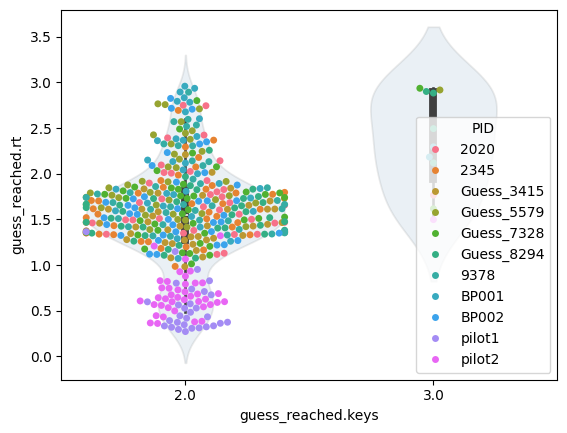

In [8]:
sns.violinplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", alpha=0.1)
sns.swarmplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", hue="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


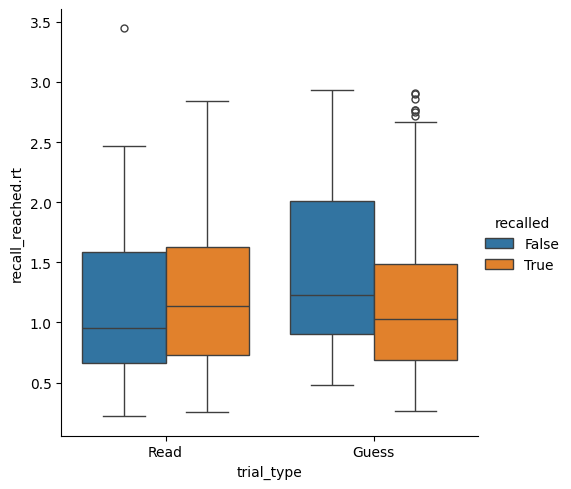

In [9]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

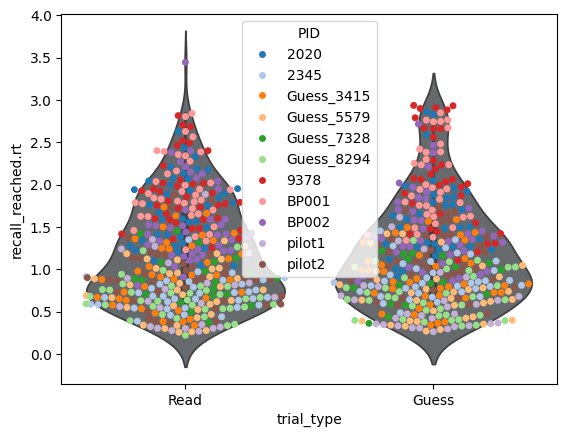

In [10]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="PID", palette='tab20')

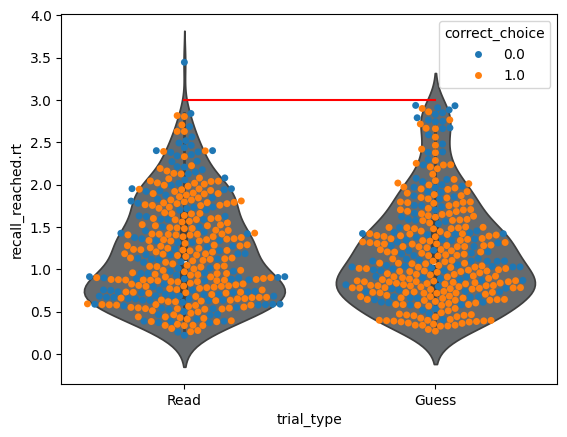

In [11]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="correct_choice")
plt.plot([0,1], [3,3], color='r')

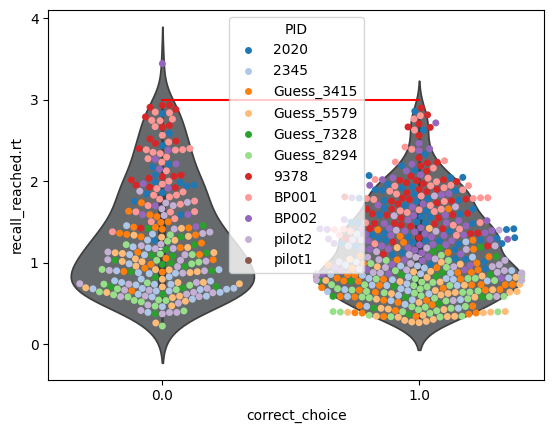

In [12]:
sns.violinplot(data = recall, x="correct_choice", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="correct_choice", y = "recall_reached.rt", hue="PID", palette='tab20')
plt.plot([0,1], [3,3], color='r')

<Axes: xlabel='trial_type', ylabel='recall_selection.rt'>

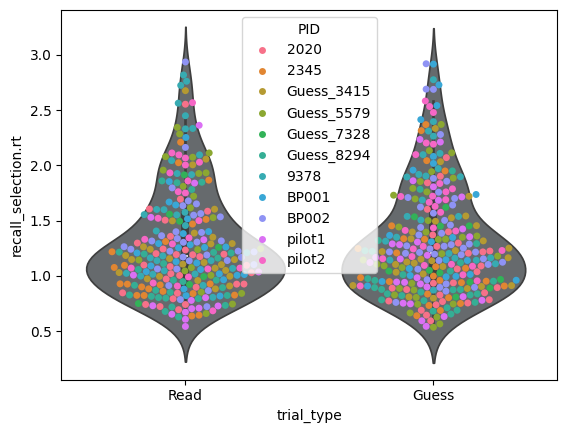

In [13]:
sns.violinplot(data = recall, x="trial_type", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_selection.rt", hue="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='corr_recalled', ylabel='recall_selection.rt'>

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


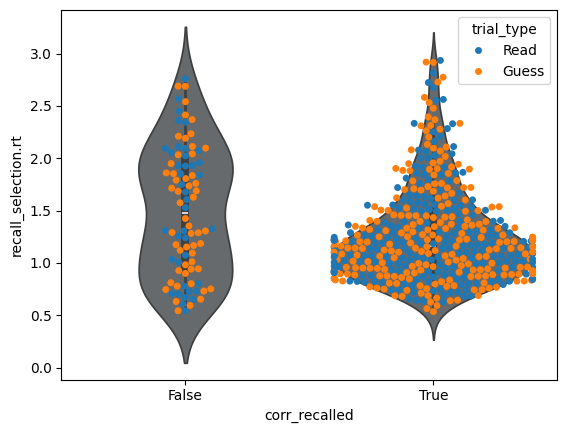

In [14]:
sns.violinplot(data = recall, x="corr_recalled", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="corr_recalled", y = "recall_selection.rt", hue="trial_type")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


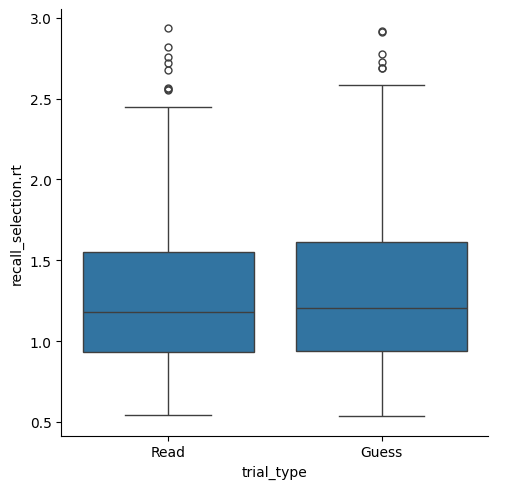

In [15]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


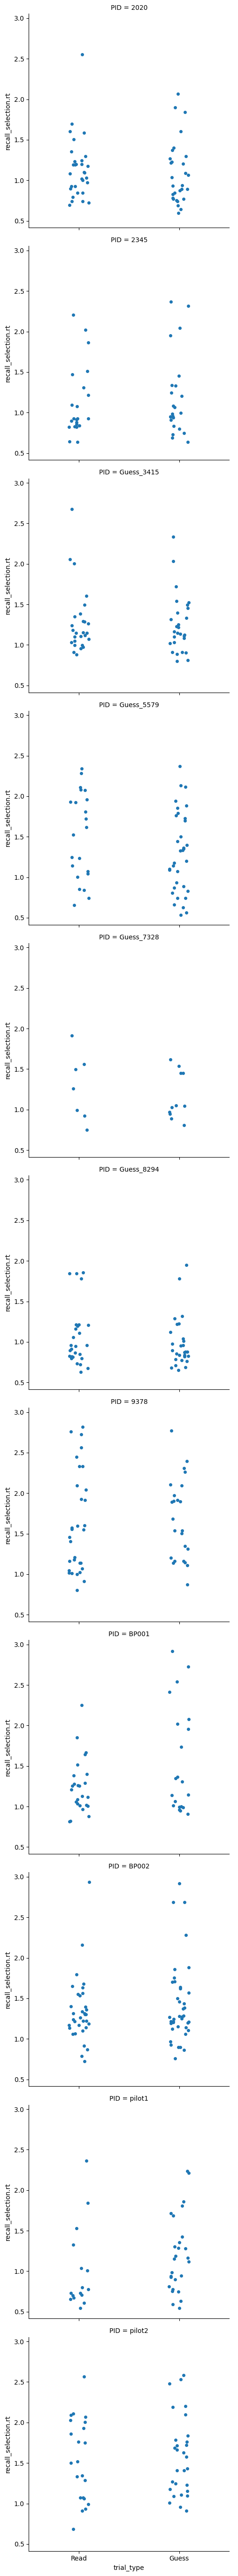

In [16]:
# Note: participant 879824 did not use the numeric keys, but the actual letter keys to select the last letter
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


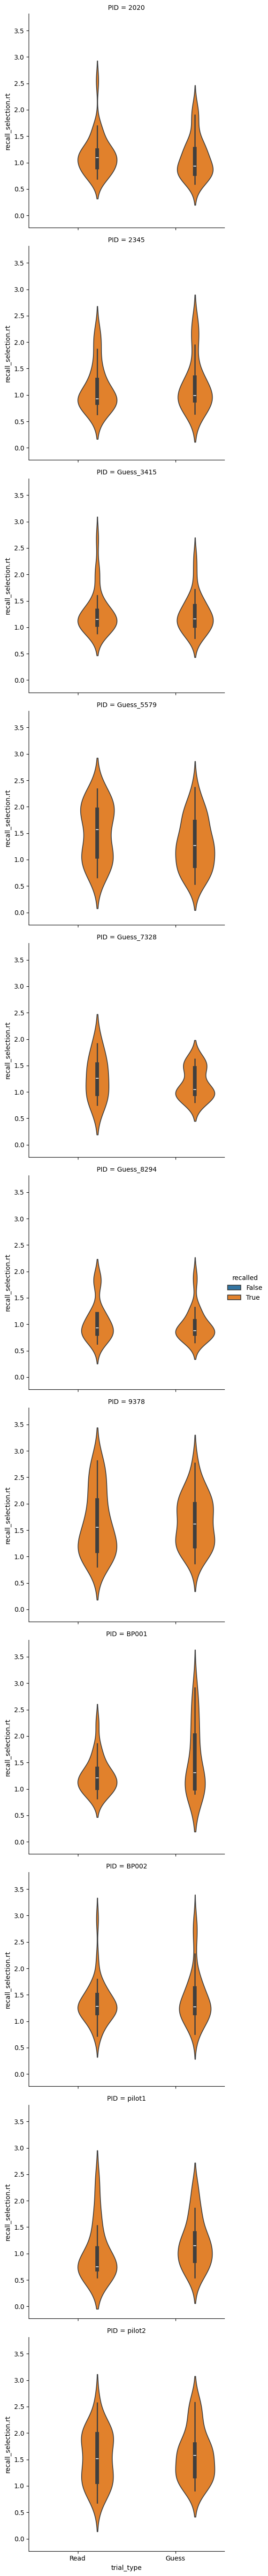

In [17]:
sns.catplot(data = recall, hue = "recalled", kind="violin", x="trial_type", y = "recall_selection.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


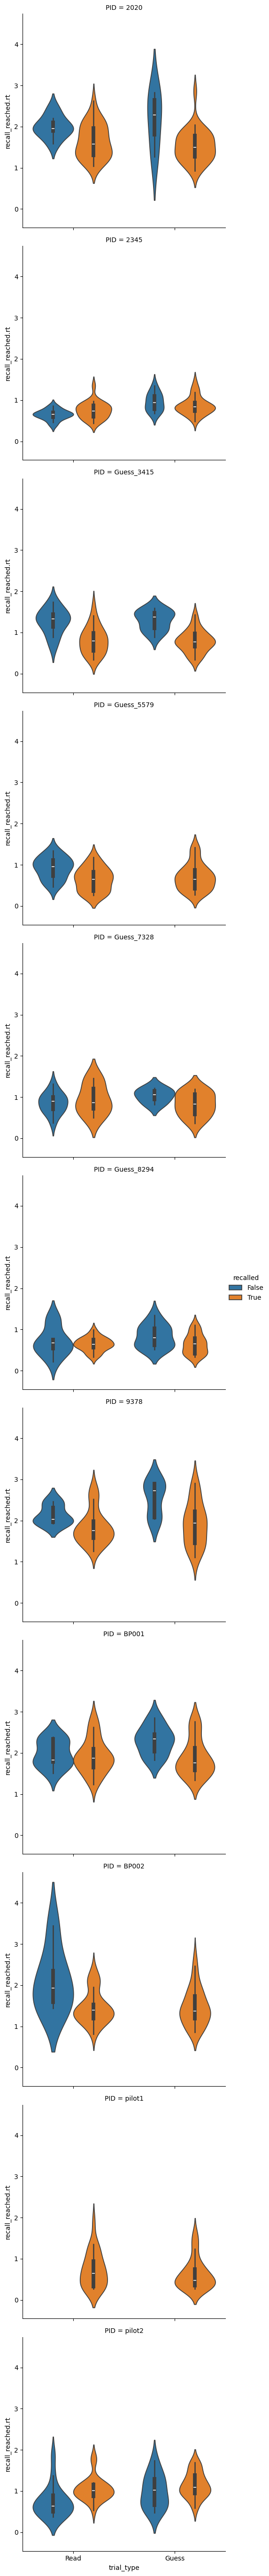

In [18]:
sns.catplot(data = recall, hue = "recalled", kind="violin", x="trial_type", y = "recall_reached.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


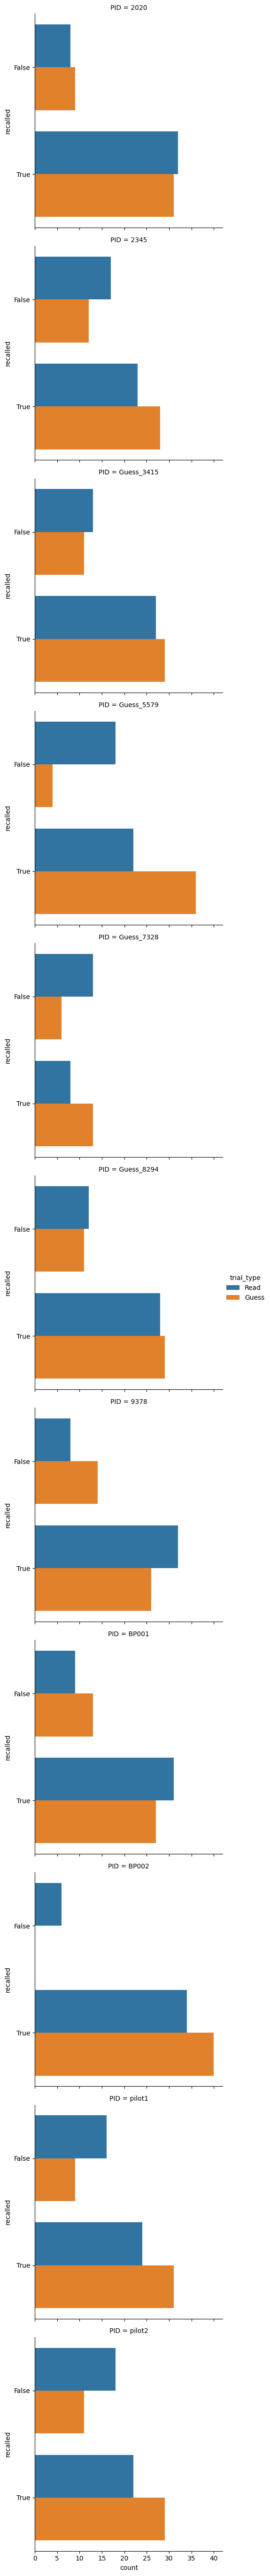

In [19]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='PID')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


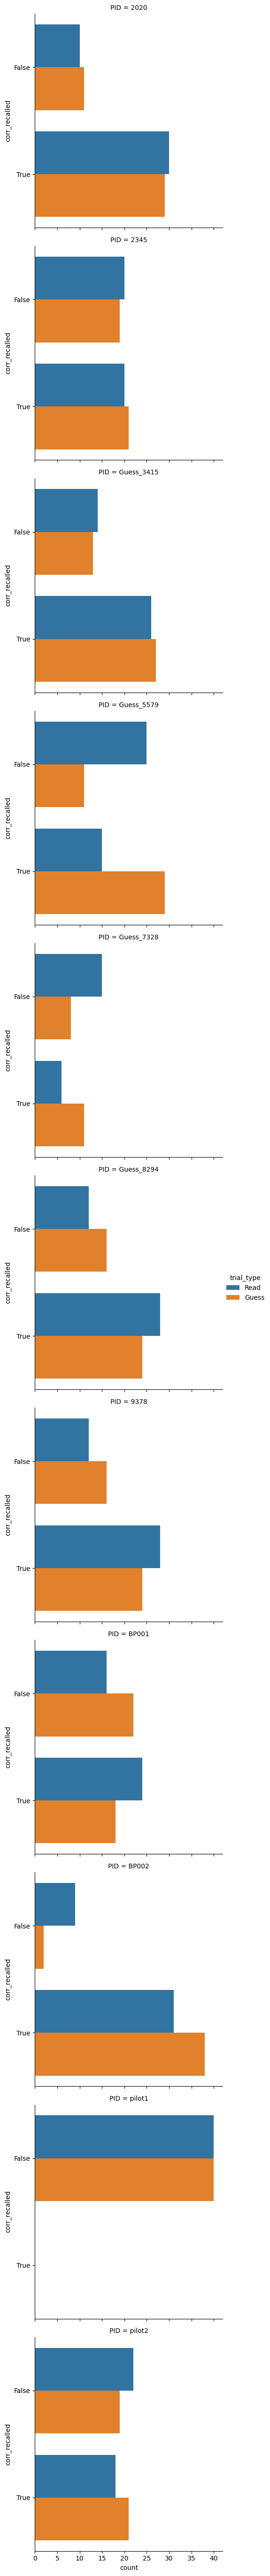

In [20]:
sns.catplot(data = recall, y = "corr_recalled", kind="count", hue="trial_type", row='PID')

In [21]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']], normalize='index')
recall_sum

trial_type   Guess            Read        
recalled     False   True    False   True 
PID                                       
2020        0.1125  0.3875  0.1000  0.4000
2345        0.1500  0.3500  0.2125  0.2875
9378        0.1750  0.3250  0.1000  0.4000
BP001       0.1625  0.3375  0.1125  0.3875
BP002       0.0000  0.5000  0.0750  0.4250
Guess_3415  0.1375  0.3625  0.1625  0.3375
Guess_5579  0.0500  0.4500  0.2250  0.2750
Guess_7328  0.1500  0.3250  0.3250  0.2000
Guess_8294  0.1375  0.3625  0.1500  0.3500
pilot1      0.1125  0.3875  0.2000  0.3000
pilot2      0.1375  0.3625  0.2250  0.2750

In [22]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

TtestResult(statistic=2.059807433548428, pvalue=0.06640861001859039, df=10)

In [26]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['corr_recalled']], normalize='index')
corr_recall_sum = corr_recall_sum.loc[[False, True, False, False, True, True, True, True, True, True, True]]
corr_recall_sum

trial_type      Guess            Read        
corr_recalled   False   True    False   True 
PID                                          
2345           0.2375  0.2625  0.2500  0.2500
BP002          0.0250  0.4750  0.1125  0.3875
Guess_3415     0.1625  0.3375  0.1750  0.3250
Guess_5579     0.1375  0.3625  0.3125  0.1875
Guess_7328     0.2000  0.2750  0.3750  0.1500
Guess_8294     0.2000  0.3000  0.1500  0.3500
pilot1         0.5000  0.0000  0.5000  0.0000
pilot2         0.2375  0.2625  0.2750  0.2250

In [27]:
scp.ttest_rel(corr_recall_sum['Guess'][True], corr_recall_sum['Read'][True])

TtestResult(statistic=1.9162805503216342, pvalue=0.09685843409625888, df=7)